## <center> **Анализ результатов A/B-тестирования**

Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы официального сайта компании и провела A/B-тестирование. Собранные в результате проведения эксперимента данные вы можете найти здесь.

Вам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям: конверсии покупки и среднему чеку. На основе проведенного анализа вам будет необходимо сделать выводы и принять решение: какой из вариантов дизайна более предпочтительный.

Итак, наша фирма предлагает следующие варианты туров и их соответствующие стоимости:
* Таиланд — 100000 рублей;
* Турция — 60000 рублей;
* Мальдивы — 200000 рублей;
* Санкт-Петербург — 10000 рублей;
* Камчатка — 150000 рублей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

Прочитаем наши данные и посмотрим на столбцы таблицы:

In [2]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


## **Задание 7.1.**

Начнем с исследования структуры наших данных. С помощью метода info() выведите информацию о типах данных и количестве непустых значений. Какой тип данных имеет столбец date?

In [3]:
display(data.info())

# Ответ на контрольный вопрос 7.1
display(f"Столбец date имеет тип данных:{data['date'].dtype}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


None

'Столбец date имеет тип данных:object'

## **Задание 7.2.**

Приведите столбец date к типу данных datetime. Убедитесь в равной длительности проведения тестирования для каждой из группы. Для этого сгруппируйте данные по признаку группы и определите первую и последнюю дату наблюдения для каждой из групп. 

В какой промежуток времени проводился A/B-тест?


In [4]:
# Приведение столбца с датой к формате datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Группировка данных по группам
group_a = data[data['group']=='A']
group_b = data[data['group']=='B']

# Ответ на контрольный вопрос 7.2
# Отображение начальных и конечных дат наблюдений в группах
display(f"Период наблюдений в группе А:{group_a['date'].min()} - {group_a['date'].max()}")
display(f"Период наблюдений в группе B:{group_b['date'].min()} - {group_b['date'].max()}")

'Период наблюдений в группе А:2021-01-02 00:00:00 - 2021-01-24 00:00:00'

'Период наблюдений в группе B:2021-01-02 00:00:00 - 2021-01-24 00:00:00'

## **Задание 7.3.**

* Чему равно количество посещений сайта в группах А и B?

* Чему равно суммарное количество покупок в группах А и B?

* Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.

In [5]:
# Ответ на контрольный вопрос 7.3
display(f"Количество посещений сайта в группе А:{group_a['date'].count()}")
display(f"Количество посещений сайта в группе B:{group_b['date'].count()}")
display(f"Суммарное количество покупок в группе А:{group_a['purchase'].sum()}")
display(f"Суммарное количество покупок в группе B:{group_b['purchase'].sum()}")
display(f"Сумма всех покупок в группе А:{group_a['price'].sum()/1000000} млн. руб.")
display(f"Сумма всех покупок в группе B:{group_b['price'].sum()/1000000} млн. руб.")

'Количество посещений сайта в группе А:147202'

'Количество посещений сайта в группе B:147276'

'Суммарное количество покупок в группе А:17723'

'Суммарное количество покупок в группе B:17514'

'Сумма всех покупок в группе А:1436.26 млн. руб.'

'Сумма всех покупок в группе B:1554.1 млн. руб.'

## **Задание 7.4.**

Проверьте, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы? Если да, то сколько таких уникальных пользователей, если нет - введите в поле для ответа 0?

**Подсказка:**

*Создайте множество пользователей группы А и множество пользователей группы B. Пересеките два этих множества (операция intersection) и вычислите количество элементов в полученном множестве.*


In [6]:
# Ответ на контрольный вопрос 7.4

users_a = set(group_a['user_id'])
users_b = set(group_b['user_id'])

user_intersection = users_a.intersection(users_b)
display(f'Количество пользователей, оказавщихся в обеих группах:{len(user_intersection)}')

'Количество пользователей, оказавщихся в обеих группах:1895'

## **Исключите пользователей, оказавшихся в обеих группах**

Так как мы не можем определить, какая из версий сайта повлияла на принятие решения, исключим этих пользователей. Далее мы будем работать только с очищенными от пересечений данными.

Возможный вариант исключения пользователей:

In [7]:
updated_data = data[data['user_id'].apply(lambda x: x not in user_intersection)]

Где user_intersection - множество пересечений пользователей групп А и B.

## **Задание 7.5.**

Для первичного анализа результатов A/B-тестирования нам понадобится таблица следующего вида:

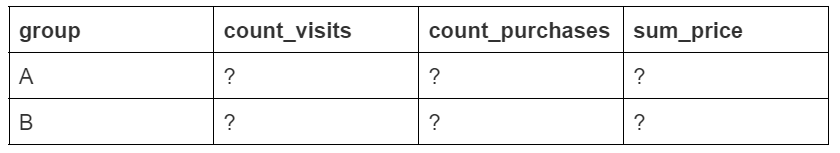
 
 
Для того, чтобы получить такую таблицу, сгруппируйте данные по признаку группы. В каждой группе рассчитайте следующие показатели:
* количество посещений (количество пользователей)
* количество совершенных покупок
* сумма всех покупок в группе

В полученной сгруппированной таблице переименуйте столбцы на **count_visits, count_purchases и sum_price**.

**Подсказка:**

*Для переименования столбцов можно использовать метод rename() с параметром columns, в который передается словарь. Ключи этого словаря - старые имена столбцов, а значения - новые.*

Чему на этот раз равно количество посещений сайта в группах А и B?


In [8]:
# Ответ на контрольный вопрос 7.5
grouped_data = updated_data.groupby('group').agg(
    {'user_id':'count', 'purchase':'sum', 'price':'sum'}
    ).reset_index().rename(
        columns={'user_id':'count_visits', 'purchase':'count_purchases', 'price':'sum_price'}
)
grouped_data

,group,count_visits,count_purchases,sum_price
0,A,145307,17487,1417780000
1,B,145381,17290,1533010000


Приведите промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной странице, можно ли говорить о сбалансированности выборок?

Выводы по заданию 7.5: Количество посещений вариантов посадочных страниц имеют сопоставимые величины. Можно сделать вывод о сбалансированности выборок

## **Задание 7.6.**

Добавьте в сгруппированную таблицу столбцы conversion - конверсия покупки (отношение количества покупок к количеству посещений сайта в каждой группе, выраженное в процентах) и mean_check - средний чек (отношение суммы покупок к количеству покупок в каждой группе).

* Чему равна конверсия в группах? Ответ приведите в процентах и округлите до сотых. Например, 75.12 %
* Чему равен средний чек в группах? Ответ приведите в рублях и округлите до целых. Например, 120519 рублей.

In [9]:
# Ответ на контрольное задание 7.6
grouped_data['conversion'] = grouped_data['count_purchases']/grouped_data['count_visits']
grouped_data['mean_check'] = grouped_data['sum_price']/grouped_data['count_purchases']

display(grouped_data)

display(f"Конверсия группы А:{round(grouped_data[grouped_data['group']=='A']['conversion']*100, 2)} %")
display(f"Конверсия группы В:{round(grouped_data[grouped_data['group']=='B']['conversion']*100, 2)} %")

display(f"Средний чек в группе А:{round(grouped_data[grouped_data['group']=='A']['mean_check'])} рублей")
display(f"Средний чек в группе В:{round(grouped_data[grouped_data['group']=='B']['mean_check'])} рублей")

,group,count_visits,count_purchases,sum_price,conversion,mean_check
0,A,145307,17487,1417780000,0.120345,81076.228055
1,B,145381,17290,1533010000,0.118929,88664.545980


'Конверсия группы А:0    12.03\nName: conversion, dtype: float64 %'

'Конверсия группы В:1    11.89\nName: conversion, dtype: float64 %'

'Средний чек в группе А:0    81076.0\nName: mean_check, dtype: float64 рублей'

'Средний чек в группе В:1    88665.0\nName: mean_check, dtype: float64 рублей'

Приведите промежуточные выводы по таблице. По какому(им) показателю(ям) вариант А эффективнее варианта B и наоборот?

Выводы по заданию 7.6: По метрике "конверсия" вариант А эффективнее варианта В (12.03% против 11.89%), по метрике "средний чек" вариант А менее эффективне чем вариант В (81076 рублей против 88665 рублей)

## **Задание 7.7.**

Теперь давайте сравним варианты по покупательской способности туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. 

price,10000,60000,100000,150000,200000
group,,,,,
A,5182,5271,1832,3478,1724
B,5201,1730,5227,3438,1694


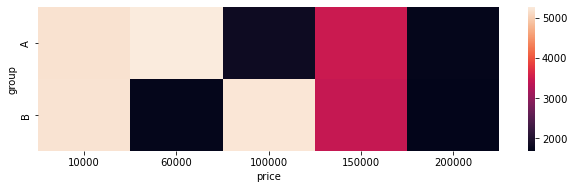

In [27]:
pv_data = pd.pivot_table(updated_data[updated_data['purchase']==1],
                         index='group',
                         columns='price',
                         values='purchase',
                         aggfunc='sum')
display(pv_data)
fig = plt.figure(figsize=(8,2))
axes = fig.add_axes([1,1,1,1])
sns.heatmap(pv_data, ax=axes);


Визуализируйте полученную сводную таблицу с помощью тепловой карты с аннотацией. 
Чему равно количество проданных туров за 60000 рублей в группах?

In [35]:
# Ответ на контрольное задание 7.7
display(f"Количество проданных туров за 60000 рублей в группе А:{pv_data.loc['A'][60000]}")
display(f"Количество проданных туров за 60000 рублей в группе В:{pv_data.loc['B'][60000]}")

'Количество проданных туров за 60000 рублей в группе А:5271'

'Количество проданных туров за 60000 рублей в группе В:1730'

Сделайте выводы по построенной таблице. По каким турам покупательская способность участников группы А выше, чем участников группы B и наоборот?

Вывод по заданию 7.7: Покупательская способность участников группы А выше покупательской способности группы В по турам стоимостью 60000, 150000, 200000 тысяч рублей. По турам стоимостью 10000 и 100000 тысяч рублей покупательская способность выше в группе В.

## **Задание 7.8.**

Настало время поговорить о стабилизации кумулятивных метрик во времени. Но прежде, чем перейти к кумулятивным метрикам, нам необходимо построить таблицу с ежедневными данными результатов проведения A/B-тестирования.

Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок. 

Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок)
* Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.

* Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.

In [73]:
# Ответ на контрольный вопрос 7.8
grouped_data_upd = updated_data.groupby(['date', 'group']).agg(
    {'purchase':'sum', 'price':'sum', 'user_id':'count'}
    ).reset_index().rename(
        columns={'purchase':'count_purchases', 'price':'sum_price', 'user_id':'count_visits'}
)

grouped_data_upd['conversion'] = grouped_data_upd['count_purchases']/grouped_data_upd['count_visits']
grouped_data_upd['mean_check'] = grouped_data_upd['sum_price']/grouped_data_upd['count_purchases']

display(grouped_data_upd.head(4))

display(f"Конверсия в группе А 2021-01-03:{round(grouped_data_upd[((grouped_data_upd['date']=='2021-01-03')&(grouped_data_upd['group']=='A'))]['conversion']*100, 2)}")
display(f"Конверсия в группе B 2021-01-03:{round(grouped_data_upd[((grouped_data_upd['date']=='2021-01-03')&(grouped_data_upd['group']=='B'))]['conversion']*100, 2)}")

display(f"Средний чек в группе А 2021-01-03:{round(grouped_data_upd[((grouped_data_upd['date']=='2021-01-03')&(grouped_data_upd['group']=='A'))]['mean_check'])}")
display(f"Средний чек в группе B 2021-01-03:{round(grouped_data_upd[((grouped_data_upd['date']=='2021-01-03')&(grouped_data_upd['group']=='B'))]['mean_check'])}")


,date,group,count_purchases,sum_price,count_visits,conversion,mean_check
0,2021-01-02,A,359,29410000,2854,0.125788,81922.005571
1,2021-01-02,B,345,29660000,2861,0.120587,85971.014493
2,2021-01-03,A,748,62000000,6596,0.113402,82887.700535
3,2021-01-03,B,754,65960000,6619,0.113914,87480.106101


'Конверсия в группе А 2021-01-03:2    11.34\nName: conversion, dtype: float64'

'Конверсия в группе B 2021-01-03:3    11.39\nName: conversion, dtype: float64'

'Средний чек в группе А 2021-01-03:2    82888.0\nName: mean_check, dtype: float64'

'Средний чек в группе B 2021-01-03:3    87480.0\nName: mean_check, dtype: float64'

## **Задание 7.9.** 

Добавьте в таблицу с ежедневными показателями кумулятивные признаки:
* кумулятивное количество посещений страницы
* кумулятивное количество покупок
* кумулятивную сумму покупок

Не забудьте при расчете кумулятивной суммы сгруппировать данные по группам. 

Вычислите кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей. 

* Какая **кумулятивная** конверсия была в группе B на 20 января? Ответ приведите в процентах, округлив до сотых.
* Какой **кумулятивный** средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.

In [13]:
# ваш код здесь

Постройте кумулятивные графики конверсии и среднего чека в каждой группе по дням. Сделайте выводы. Можно ли назвать A/B-тест завершенным - стабилизировались ли значения метрик во времени? Как соотносятся кумулятивные показатели в каждой группе?

In [14]:
# ваш код здесь

ваши выводы здесь

## **Задание 7.10.**

Настало время переходить к проверке статистической значимости разницы между метриками в группах. Начнем с конверсии.

Какой тест вы примените для проверки гипотезы о равенстве конверсий в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Конверсии в группах А и B равны; 
* $H_1$: Конверсия в группе А больше чем конверсия в группе B;

Вычислите p-value вашего теста для конверсий в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$=0.05. 

In [15]:
# ваш код здесь

Приведите свои выводы по результатам проведенного статистического теста. Есть ли статистическая разница между конверсиями в группах А и B?

ваши выводы здесь

## **Задание 7.11.**
Убедитесь в своих рассуждениях, построив 95%-ый доверительный интервал для конверсий и разницы между ними. Используйте $z_{крит}$ в своих расчетах

Укажите нижнюю и верхнюю границы доверительных интервалов. Границы приведите в процентах и округлите до 2 знака после запятой. Например: нижняя граница 89.24%, верхняя граница 91.25%.

In [16]:
# ваш код здесь

Проинтерпретируйте построенные доверительные интервалы для конверсий в группах. Есть ли перекрытие между доверительными интервалами для групп? Есть ли статистическая разница между конверсиями в группах А и B?

In [17]:
ваши выводы здесь

SyntaxError: invalid syntax (Temp/ipykernel_15960/3546990623.py, line 1)

## **Задание 7.12.**

Ранее мы построили таблицу с ежедневными показателями. Теперь она нам снова понадобится, так как нас интересует ежедневный средний чек.

Проверьте гипотезу о нормальности распределения ежедневного среднего чека в каждой из групп тестирования. 

* Какой тест вы примените  для проверки гипотезы о нормальности распределения ежедневного среднего чека?
* Как будут звучать нулевая и альтернативная гипотезы?
* Каковы результаты статистического теста с уровнем значимости $\alpha$ =0.05?

In [ ]:
# ваш код здесь

## **Задание 7.13.**
Настало время сравнить варианты дизайна страницы по метрике среднего чека. 

Какой тест вы примените для проверки гипотезы о равенстве средних чеков по дням в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Ежедневные средние чеки в группах А и B равны; 
* $H_1$: Ежедневный средний чек в группе А меньше чем в группе B;

Вычислите p-value вашего теста для ежедневного среднего чека в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$ =0.05. 

In [ ]:
# ваш код здесь

 Приведите свои выводы по проведенному статистическому тесту. Есть ли статистическая разница между ежедневными средними чеками в группах А и B?

In [ ]:
ваши выводы здесь

## **Задание 7.14.**

Постройте 95%-ый доверительный интервал для среднего чека в каждой группе. Так как выборка средних чеков небольшая, используйте  $t_{крит}$ в своих расчетах.

Укажите нижнюю границу доверительного интервала для истинного среднего чека каждой из групп. Ответ приведите в процентах и округлите до целого.

In [ ]:
# ваш код здесь

Проинтерпретируйте построенные доверительные интервалы для ежедневных средних чеков в группах. Есть ли между ними пересечения?

In [ ]:
ваши выводы здесь

## **Сделайте общий вывод по результатам A/B-теста**

Какой варианта дизайна посадочной страницы является более эффективным в комплексе по метрикам конверсии и среднего чека и почему? 